In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [6]:
def flux(phi,phi_ext,phi_a,beta_L):
    return phi-phi_ext+(beta_L/(2*np.pi))*np.sin(np.pi*phi)*np.cos(phi_a-np.pi*phi)
beta_LL=[0,0.5,1.0] 
phi_extext= np.linspace(-2,2,201)
phi_aa=np.linspace(0,2 * np.pi,100)

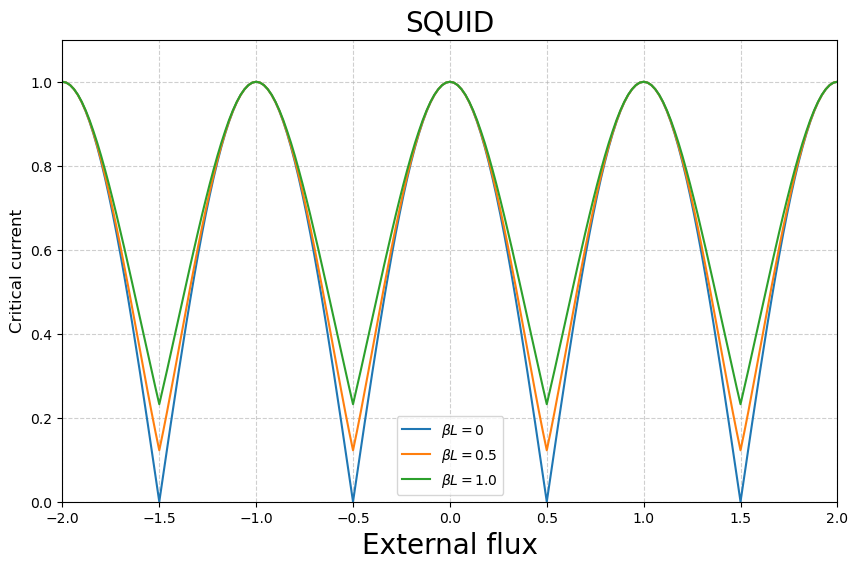

In [8]:
plt.figure(figsize=(10, 6))
for beta_L in beta_LL:
    x=[]
    for phi_ext in phi_extext:
        y=[]
        for phi_a in phi_aa:
            initial_guess=phi_ext
            phi_norm=fsolve(flux,initial_guess,args=(phi_ext,phi_a,beta_L))[0]
            phi_b=phi_a-2*np.pi*phi_norm
            totalcurrent=np.sin(phi_a)+np.sin(phi_b)
            y.append(totalcurrent)        
        maxcurrent = np.max(np.abs(y))
        x.append(maxcurrent)        
    plt.plot(phi_extext,np.array(x)/2.0,label=f'$\\beta L= {beta_L}$')
plt.title("SQUID",fontsize=20)
plt.xlabel("External flux",fontsize=20)
plt.ylabel("Critical current",fontsize=12)
plt.grid(True,linestyle='--',alpha=0.6)
plt.legend(fontsize=10)
plt.xlim(-2,2)
plt.ylim(0,1.1)
plt.show()